## 머신러닝
# 신경망

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### sklearn 의 선형회귀 적용

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :3], iris.data[:, 3])
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((112, 3), (38, 3), (112,), (38,))

In [89]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [90]:
y_pred

array([-0.0097113 ,  1.74775699,  2.04777827,  2.00396764,  0.80442488,
        1.60069853,  1.20263755,  1.98610511,  0.26785641,  2.56497485,
        0.33958992,  1.72440297,  1.51798204,  0.23192491,  1.61743199,
        0.316594  ,  1.54808613,  0.22278722,  0.27791675,  0.28410227,
        0.39050871,  1.8289863 ,  1.46742136,  2.10326592,  0.27827486,
        0.06510388,  1.38021295,  0.21201066,  1.12379588,  0.2638521 ,
        0.167506  ,  1.40995893,  1.29680243,  0.96028512,  2.3908614 ,
        2.11768867,  0.21968336,  1.39532974])

In [91]:
model.coef_      # [w1, w2, w3]

array([-0.16245862,  0.2299592 ,  0.50918795])

In [92]:
model.intercept_ # b

-0.46949801443504624

- 선형회귀 공식
> $$ \hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + b $$

### 신경망의 선형회귀 적용
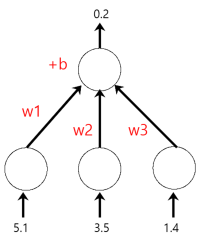
> pip intall tensorflow

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
tf.__version__

'2.10.1'

In [132]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_shape=[3]))
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [133]:
model.compile(loss='mse', optimizer='sgd')

In [134]:
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=[X_test, y_test])

Epoch 1/100
7/7 [==============================] - 0s 33ms/step - loss: 0.9616 - val_loss: 0.1162
Epoch 2/100
7/7 [==============================] - 0s 15ms/step - loss: 0.1683 - val_loss: 0.1118
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.1798 - val_loss: 0.1033
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 0.1357 - val_loss: 0.1052
Epoch 5/100
7/7 [==============================] - 0s 14ms/step - loss: 0.1499 - val_loss: 0.0996
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.1489 - val_loss: 0.1085
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 0.1515 - val_loss: 0.1166
Epoch 8/100
7/7 [==============================] - 0s 13ms/step - loss: 0.1335 - val_loss: 0.0993
Epoch 9/100
7/7 [==============================] - 0s 15ms/step - loss: 0.1369 - val_loss: 0.0971
Epoch 10/100
7/7 [==============================] - 0s 12ms/step - loss: 0.1451 - val_loss: 0.0935
Epoch 11/100
7/7 [=

Epoch 84/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0642 - val_loss: 0.0488
Epoch 85/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0697 - val_loss: 0.0459
Epoch 86/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0631 - val_loss: 0.0462
Epoch 87/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0646 - val_loss: 0.0453
Epoch 88/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0652 - val_loss: 0.0480
Epoch 89/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0729 - val_loss: 0.0545
Epoch 90/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0653 - val_loss: 0.0445
Epoch 91/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0605 - val_loss: 0.0442
Epoch 92/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0638 - val_loss: 0.0441
Epoch 93/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0717 - val_loss: 0.0475
Epoch 94/1

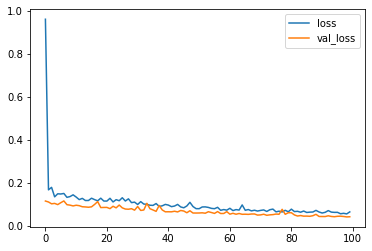

In [135]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [136]:
model.get_weights() # w, b

[array([[-0.54368865],
        [ 0.57264453],
        [ 0.7062145 ]], dtype=float32),
 array([0.00865287], dtype=float32)]

In [137]:
y_pred_nn = model.predict(X_test)
y_pred_nn

2/2 [==============================] - 0s 6ms/step


array([[-0.20278496],
       [ 1.7885128 ],
       [ 2.1150863 ],
       [ 1.9080725 ],
       [ 0.78609556],
       [ 1.954155  ],
       [ 1.1603057 ],
       [ 2.0872514 ],
       [ 0.25084072],
       [ 2.7299368 ],
       [ 0.47121173],
       [ 1.870537  ],
       [ 1.5394733 ],
       [ 0.32884794],
       [ 1.4928503 ],
       [ 0.4139474 ],
       [ 1.460345  ],
       [ 0.13808638],
       [ 0.44337684],
       [ 0.30520946],
       [ 0.5418332 ],
       [ 2.0603573 ],
       [ 1.3295637 ],
       [ 2.2810886 ],
       [ 0.3040884 ],
       [-0.02987057],
       [ 1.4762374 ],
       [ 0.22412664],
       [ 1.0763273 ],
       [ 0.29652268],
       [ 0.25243527],
       [ 1.5363976 ],
       [ 1.2968785 ],
       [ 0.9072493 ],
       [ 2.1840065 ],
       [ 2.2886543 ],
       [ 0.22879678],
       [ 1.248481  ]], dtype=float32)

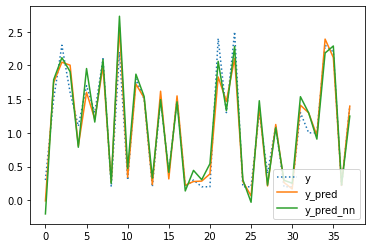

In [138]:
plt.plot(y_test, ':')
plt.plot(y_pred)
plt.plot(y_pred_nn)
plt.legend(['y', 'y_pred', 'y_pred_nn'], loc=4)

### 중간층 추가

In [139]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(3, input_shape=[3]))
model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 3)                 12        
                                                                 
 dense_23 (Dense)            (None, 1)                 4         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [140]:
model.compile(loss='mse', optimizer='sgd')

In [141]:
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=[X_test, y_test])

Epoch 1/100
7/7 [==============================] - 0s 32ms/step - loss: 2.5007 - val_loss: 0.1621
Epoch 2/100
7/7 [==============================] - 0s 15ms/step - loss: 0.1438 - val_loss: 0.1355
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 0.1196 - val_loss: 0.1066
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0880 - val_loss: 0.0798
Epoch 5/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0750 - val_loss: 0.0691
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0640 - val_loss: 0.0477
Epoch 7/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0538 - val_loss: 0.0415
Epoch 8/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0506 - val_loss: 0.0398
Epoch 9/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0534 - val_loss: 0.0549
Epoch 10/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0545 - val_loss: 0.0453
Epoch 11/100
7/7 [=

Epoch 84/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0410 - val_loss: 0.0350
Epoch 85/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0426 - val_loss: 0.0341
Epoch 86/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0386 - val_loss: 0.0333
Epoch 87/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0436 - val_loss: 0.0364
Epoch 88/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0400 - val_loss: 0.0343
Epoch 89/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0376 - val_loss: 0.0342
Epoch 90/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0385 - val_loss: 0.0336
Epoch 91/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0409 - val_loss: 0.0341
Epoch 92/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0393 - val_loss: 0.0388
Epoch 93/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0384 - val_loss: 0.0331
Epoch 94/1

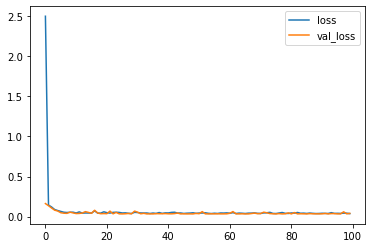

In [142]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [143]:
model.get_weights() # w, b

[array([[-0.00597095,  0.39597392, -0.7335748 ],
        [ 0.71566355,  0.18133886,  0.48242486],
        [-0.18185152,  0.81400853,  0.5396077 ]], dtype=float32),
 array([-0.0036582 , -0.05102156, -0.02689522], dtype=float32),
 array([[-0.0930178 ],
        [ 0.31941798],
        [ 0.4962721 ]], dtype=float32),
 array([-0.05895706], dtype=float32)]

In [144]:
y_pred_nn = model.predict(X_test)
y_pred_nn

2/2 [==============================] - 0s 5ms/step


array([[0.08406292],
       [1.8427408 ],
       [2.119668  ],
       [2.0568817 ],
       [0.91402507],
       [1.7785032 ],
       [1.3177818 ],
       [2.0913975 ],
       [0.3027661 ],
       [2.6132326 ],
       [0.3969477 ],
       [1.8273542 ],
       [1.584516  ],
       [0.3225238 ],
       [1.6608181 ],
       [0.37387112],
       [1.5992781 ],
       [0.2905071 ],
       [0.36867723],
       [0.32646766],
       [0.45141938],
       [1.9612489 ],
       [1.5223545 ],
       [2.190148  ],
       [0.36098698],
       [0.11877386],
       [1.4953302 ],
       [0.23997645],
       [1.2319151 ],
       [0.3283423 ],
       [0.26930168],
       [1.5177821 ],
       [1.3934555 ],
       [1.0947013 ],
       [2.4452548 ],
       [2.222793  ],
       [0.2732459 ],
       [1.435863  ]], dtype=float32)

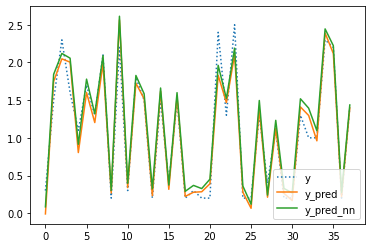

In [145]:
plt.plot(y_test, ':')
plt.plot(y_pred)
plt.plot(y_pred_nn)
plt.legend(['y', 'y_pred', 'y_pred_nn'], loc=4)

### 분류

In [146]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [149]:
y_train

array([2, 1, 1, 0, 2, 2, 2, 0, 1, 0, 2, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 2,
       2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 0, 2, 2, 2,
       1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0,
       2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1,
       1, 1])

In [150]:
### 셋 이상을 분류할 때는 원핫인코딩(one-hot-encoding 을 적용해야 한다)
y_train_oh = np.eye(3)[y_train]
y_test_oh = np.eye(3)[y_test]

y_train_oh.shape, y_test_oh.shape

((112, 3), (38, 3))

In [152]:
display(y_train[:5], y_train_oh[:5])

array([2, 1, 1, 0, 2])

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [176]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(5, activation='sigmoid', input_shape=[4]))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 5)                 25        
                                                                 
 dense_40 (Dense)            (None, 3)                 18        
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [177]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [178]:
model.fit(X_train, y_train_oh, epochs=500, validation_data=[X_test, y_test_oh])

Epoch 1/500
4/4 [==============================] - 1s 79ms/step - loss: 1.3323 - acc: 0.3661 - val_loss: 1.2643 - val_acc: 0.2368
Epoch 2/500
4/4 [==============================] - 0s 29ms/step - loss: 1.3188 - acc: 0.3661 - val_loss: 1.2536 - val_acc: 0.2368
Epoch 3/500
4/4 [==============================] - 0s 28ms/step - loss: 1.3075 - acc: 0.3661 - val_loss: 1.2432 - val_acc: 0.2368
Epoch 4/500
4/4 [==============================] - 0s 28ms/step - loss: 1.2959 - acc: 0.3661 - val_loss: 1.2331 - val_acc: 0.2368
Epoch 5/500
4/4 [==============================] - 0s 26ms/step - loss: 1.2842 - acc: 0.3661 - val_loss: 1.2244 - val_acc: 0.2368
Epoch 6/500
4/4 [==============================] - 0s 24ms/step - loss: 1.2734 - acc: 0.3661 - val_loss: 1.2161 - val_acc: 0.2368
Epoch 7/500
4/4 [==============================] - 0s 26ms/step - loss: 1.2636 - acc: 0.3661 - val_loss: 1.2076 - val_acc: 0.2368
Epoch 8/500
4/4 [==============================] - 0s 25ms/step - loss: 1.2533 - acc: 0.37

4/4 [==============================] - 0s 22ms/step - loss: 0.9951 - acc: 0.6518 - val_loss: 0.9736 - val_acc: 0.7105
Epoch 64/500
4/4 [==============================] - 0s 24ms/step - loss: 0.9930 - acc: 0.6518 - val_loss: 0.9708 - val_acc: 0.7105
Epoch 65/500
4/4 [==============================] - 0s 21ms/step - loss: 0.9908 - acc: 0.6518 - val_loss: 0.9680 - val_acc: 0.7105
Epoch 66/500
4/4 [==============================] - 0s 22ms/step - loss: 0.9886 - acc: 0.6518 - val_loss: 0.9654 - val_acc: 0.7105
Epoch 67/500
4/4 [==============================] - 0s 23ms/step - loss: 0.9864 - acc: 0.6518 - val_loss: 0.9626 - val_acc: 0.7105
Epoch 68/500
4/4 [==============================] - 0s 23ms/step - loss: 0.9841 - acc: 0.6518 - val_loss: 0.9601 - val_acc: 0.7105
Epoch 69/500
4/4 [==============================] - 0s 24ms/step - loss: 0.9822 - acc: 0.6518 - val_loss: 0.9574 - val_acc: 0.7105
Epoch 70/500
4/4 [==============================] - 0s 23ms/step - loss: 0.9796 - acc: 0.6518 - 

4/4 [==============================] - 0s 23ms/step - loss: 0.8298 - acc: 0.6607 - val_loss: 0.7744 - val_acc: 0.7632
Epoch 126/500
4/4 [==============================] - 0s 22ms/step - loss: 0.8268 - acc: 0.6607 - val_loss: 0.7712 - val_acc: 0.7632
Epoch 127/500
4/4 [==============================] - 0s 22ms/step - loss: 0.8239 - acc: 0.6607 - val_loss: 0.7681 - val_acc: 0.7632
Epoch 128/500
4/4 [==============================] - 0s 23ms/step - loss: 0.8210 - acc: 0.6607 - val_loss: 0.7646 - val_acc: 0.7632
Epoch 129/500
4/4 [==============================] - 0s 23ms/step - loss: 0.8183 - acc: 0.6607 - val_loss: 0.7608 - val_acc: 0.7632
Epoch 130/500
4/4 [==============================] - 0s 25ms/step - loss: 0.8152 - acc: 0.6607 - val_loss: 0.7577 - val_acc: 0.7632
Epoch 131/500
4/4 [==============================] - 0s 23ms/step - loss: 0.8123 - acc: 0.6607 - val_loss: 0.7540 - val_acc: 0.7632
Epoch 132/500
4/4 [==============================] - 0s 23ms/step - loss: 0.8095 - acc: 0.

4/4 [==============================] - 0s 24ms/step - loss: 0.6791 - acc: 0.6964 - val_loss: 0.5928 - val_acc: 0.7895
Epoch 188/500
4/4 [==============================] - 0s 24ms/step - loss: 0.6773 - acc: 0.6964 - val_loss: 0.5902 - val_acc: 0.7895
Epoch 189/500
4/4 [==============================] - 0s 26ms/step - loss: 0.6754 - acc: 0.6964 - val_loss: 0.5878 - val_acc: 0.7895
Epoch 190/500
4/4 [==============================] - 0s 24ms/step - loss: 0.6736 - acc: 0.6964 - val_loss: 0.5853 - val_acc: 0.7895
Epoch 191/500
4/4 [==============================] - 0s 24ms/step - loss: 0.6716 - acc: 0.6964 - val_loss: 0.5831 - val_acc: 0.7895
Epoch 192/500
4/4 [==============================] - 0s 28ms/step - loss: 0.6699 - acc: 0.7054 - val_loss: 0.5809 - val_acc: 0.7895
Epoch 193/500
4/4 [==============================] - 0s 23ms/step - loss: 0.6682 - acc: 0.7054 - val_loss: 0.5788 - val_acc: 0.7895
Epoch 194/500
4/4 [==============================] - 0s 24ms/step - loss: 0.6662 - acc: 0.

4/4 [==============================] - 0s 23ms/step - loss: 0.5879 - acc: 0.8929 - val_loss: 0.4910 - val_acc: 0.8947
Epoch 250/500
4/4 [==============================] - 0s 23ms/step - loss: 0.5867 - acc: 0.9018 - val_loss: 0.4898 - val_acc: 0.8947
Epoch 251/500
4/4 [==============================] - 0s 24ms/step - loss: 0.5855 - acc: 0.9018 - val_loss: 0.4886 - val_acc: 0.8947
Epoch 252/500
4/4 [==============================] - 0s 23ms/step - loss: 0.5845 - acc: 0.9107 - val_loss: 0.4875 - val_acc: 0.8947
Epoch 253/500
4/4 [==============================] - 0s 24ms/step - loss: 0.5832 - acc: 0.9107 - val_loss: 0.4863 - val_acc: 0.8947
Epoch 254/500
4/4 [==============================] - 0s 22ms/step - loss: 0.5821 - acc: 0.9107 - val_loss: 0.4852 - val_acc: 0.8947
Epoch 255/500
4/4 [==============================] - 0s 22ms/step - loss: 0.5810 - acc: 0.9196 - val_loss: 0.4841 - val_acc: 0.8947
Epoch 256/500
4/4 [==============================] - 0s 22ms/step - loss: 0.5798 - acc: 0.

4/4 [==============================] - 0s 26ms/step - loss: 0.5228 - acc: 0.9732 - val_loss: 0.4283 - val_acc: 0.9211
Epoch 312/500
4/4 [==============================] - 0s 22ms/step - loss: 0.5218 - acc: 0.9732 - val_loss: 0.4275 - val_acc: 0.9211
Epoch 313/500
4/4 [==============================] - 0s 20ms/step - loss: 0.5208 - acc: 0.9732 - val_loss: 0.4265 - val_acc: 0.9211
Epoch 314/500
4/4 [==============================] - 0s 23ms/step - loss: 0.5199 - acc: 0.9732 - val_loss: 0.4256 - val_acc: 0.9211
Epoch 315/500
4/4 [==============================] - 0s 23ms/step - loss: 0.5189 - acc: 0.9732 - val_loss: 0.4247 - val_acc: 0.9211
Epoch 316/500
4/4 [==============================] - 0s 24ms/step - loss: 0.5181 - acc: 0.9732 - val_loss: 0.4239 - val_acc: 0.9211
Epoch 317/500
4/4 [==============================] - 0s 21ms/step - loss: 0.5171 - acc: 0.9732 - val_loss: 0.4228 - val_acc: 0.9211
Epoch 318/500
4/4 [==============================] - 0s 23ms/step - loss: 0.5160 - acc: 0.

4/4 [==============================] - 0s 22ms/step - loss: 0.4638 - acc: 0.9911 - val_loss: 0.3756 - val_acc: 0.9211
Epoch 374/500
4/4 [==============================] - 0s 23ms/step - loss: 0.4626 - acc: 0.9911 - val_loss: 0.3746 - val_acc: 0.9211
Epoch 375/500
4/4 [==============================] - 0s 26ms/step - loss: 0.4619 - acc: 0.9911 - val_loss: 0.3736 - val_acc: 0.9211
Epoch 376/500
4/4 [==============================] - 0s 29ms/step - loss: 0.4608 - acc: 0.9911 - val_loss: 0.3728 - val_acc: 0.9211
Epoch 377/500
4/4 [==============================] - 0s 25ms/step - loss: 0.4602 - acc: 0.9911 - val_loss: 0.3722 - val_acc: 0.9211
Epoch 378/500
4/4 [==============================] - 0s 26ms/step - loss: 0.4590 - acc: 0.9911 - val_loss: 0.3716 - val_acc: 0.9211
Epoch 379/500
4/4 [==============================] - 0s 25ms/step - loss: 0.4579 - acc: 0.9911 - val_loss: 0.3708 - val_acc: 0.9211
Epoch 380/500
4/4 [==============================] - 0s 22ms/step - loss: 0.4573 - acc: 0.

4/4 [==============================] - 0s 27ms/step - loss: 0.4072 - acc: 0.9911 - val_loss: 0.3279 - val_acc: 0.9211
Epoch 436/500
4/4 [==============================] - 0s 20ms/step - loss: 0.4065 - acc: 0.9911 - val_loss: 0.3273 - val_acc: 0.9211
Epoch 437/500
4/4 [==============================] - 0s 25ms/step - loss: 0.4056 - acc: 0.9911 - val_loss: 0.3264 - val_acc: 0.9211
Epoch 438/500
4/4 [==============================] - 0s 22ms/step - loss: 0.4046 - acc: 0.9911 - val_loss: 0.3256 - val_acc: 0.9474
Epoch 439/500
4/4 [==============================] - 0s 21ms/step - loss: 0.4037 - acc: 0.9911 - val_loss: 0.3247 - val_acc: 0.9474
Epoch 440/500
4/4 [==============================] - 0s 24ms/step - loss: 0.4029 - acc: 0.9911 - val_loss: 0.3240 - val_acc: 0.9474
Epoch 441/500
4/4 [==============================] - 0s 24ms/step - loss: 0.4020 - acc: 0.9911 - val_loss: 0.3231 - val_acc: 0.9474
Epoch 442/500
4/4 [==============================] - 0s 20ms/step - loss: 0.4013 - acc: 0.

4/4 [==============================] - 0s 21ms/step - loss: 0.3558 - acc: 0.9911 - val_loss: 0.2868 - val_acc: 0.9474
Epoch 498/500
4/4 [==============================] - 0s 21ms/step - loss: 0.3549 - acc: 0.9911 - val_loss: 0.2862 - val_acc: 0.9474
Epoch 499/500
4/4 [==============================] - 0s 22ms/step - loss: 0.3543 - acc: 0.9911 - val_loss: 0.2853 - val_acc: 0.9474
Epoch 500/500
4/4 [==============================] - 0s 21ms/step - loss: 0.3536 - acc: 0.9911 - val_loss: 0.2846 - val_acc: 0.9474


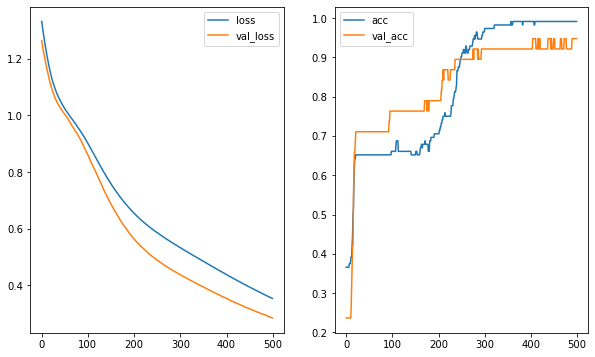

In [179]:
plt.figure(figsize=[10,6])

plt.subplot(1,2,1)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

In [180]:
y_pred = model.predict(X_test)
y_pred

2/2 [==============================] - 0s 5ms/step


array([[0.05897644, 0.6484016 , 0.2926219 ],
       [0.01454655, 0.33614385, 0.6493096 ],
       [0.01952513, 0.3898916 , 0.5905833 ],
       [0.02413998, 0.42899948, 0.5468606 ],
       [0.9328308 , 0.06237365, 0.00479543],
       [0.9303834 , 0.06453675, 0.00507996],
       [0.9452796 , 0.05091619, 0.00380422],
       [0.01272945, 0.3119755 , 0.67529505],
       [0.04043254, 0.57350296, 0.3860645 ],
       [0.02849884, 0.49200365, 0.4794975 ],
       [0.06516793, 0.6463577 , 0.28847438],
       [0.01021575, 0.26903972, 0.72074455],
       [0.9323765 , 0.06253683, 0.00508666],
       [0.01839267, 0.3932597 , 0.5883476 ],
       [0.9537782 , 0.04309437, 0.00312744],
       [0.94023937, 0.05548416, 0.00427653],
       [0.01434217, 0.33148214, 0.6541757 ],
       [0.14740896, 0.6809442 , 0.17164685],
       [0.9384481 , 0.05718765, 0.00436424],
       [0.92076164, 0.07339947, 0.00583883],
       [0.0111209 , 0.2856237 , 0.70325536],
       [0.01081484, 0.2795417 , 0.7096435 ],
       [0.

In [181]:
y_pred.argmax(axis=1)

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 2, 1, 0, 0, 2, 2,
       1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0], dtype=int64)

In [182]:
y_test

array([1, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 2, 1, 0, 0, 2, 2,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0])

In [183]:
np.where(y_test != y_pred.argmax(axis=1))

(array([ 3, 24], dtype=int64),)

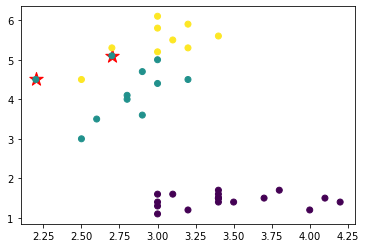

In [196]:
plt.scatter(X_test[[3,24], 1], X_test[[3,24], 2], c='r', marker='*', s=200)
plt.scatter(X_test[:, 1], X_test[:, 2], c=y_test)